In [13]:
import numpy as np
import pandas as pd
import yfinance as yf

yf.pdr_override()
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2016-01-01'
end = '2019-12-30'

# Tickers of assets
assets = ["GC=F", 'MSFT', 'TSLA', 'WMT', 'JPM', 'SHEL']
assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets
# Calculating returns
Y = data[assets].pct_change().dropna()

display(Y.head())

[*********************100%***********************]  6 of 6 completed


,GC=F,JPM,MSFT,SHEL,TSLA,WMT
Date,,,,,,
2016-01-05,0.3070%,0.1729%,0.4562%,-0.4801%,0.0090%,2.3755%
2016-01-06,1.2519%,-1.4436%,-1.8165%,-3.4861%,-1.9648%,1.0013%
2016-01-07,1.4470%,-4.0440%,-3.4782%,-4.3162%,-1.5477%,2.3289%
2016-01-08,-0.8937%,-2.2399%,0.3067%,-4.1310%,-2.1563%,-2.2913%
2016-01-11,-0.1184%,-0.1528%,-0.0573%,-0.8420%,-1.4929%,1.0702%


In [14]:
Y

,GC=F,JPM,MSFT,SHEL,TSLA,WMT
Date,,,,,,
2016-01-05,0.3070%,0.1729%,0.4562%,-0.4801%,0.0090%,2.3755%
2016-01-06,1.2519%,-1.4436%,-1.8165%,-3.4861%,-1.9648%,1.0013%
2016-01-07,1.4470%,-4.0440%,-3.4782%,-4.3162%,-1.5477%,2.3289%
2016-01-08,-0.8937%,-2.2399%,0.3067%,-4.1310%,-2.1563%,-2.2913%
2016-01-11,-0.1184%,-0.1528%,-0.0573%,-0.8420%,-1.4929%,1.0702%
...,...,...,...,...,...,...
2019-12-20,-0.2368%,-0.0801%,1.0918%,-1.2224%,0.3836%,0.1749%
2019-12-23,0.5289%,-0.0291%,0.0000%,1.0657%,3.3605%,-1.0474%
2019-12-24,1.1197%,0.2770%,-0.0191%,-0.1701%,1.4384%,0.4033%


In [30]:
import riskfolio as rp

# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='ewma1' # Method to estimate expected returns based on historical data.
method_cov='ewma1' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
b = None # Risk contribution constraints vector
w_rp = port.rp_optimization(model=model, rm=rm, rf=rf, b=b, hist=hist)

display(w_rp.T)

,GC=F,JPM,MSFT,SHEL,TSLA,WMT
weights,33.9126%,12.7572%,15.5733%,12.9854%,4.9254%,19.8460%


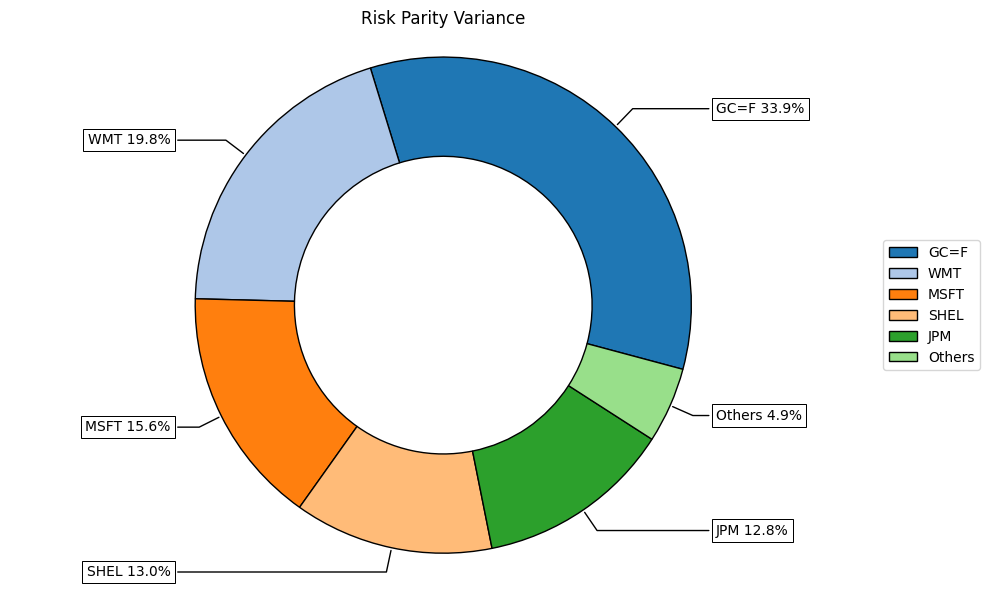

In [29]:
ax = rp.plot_pie(w=w_rp,
                 title='Risk Parity Variance',
                 others=0.05,
                 nrow=25,
                 cmap = "tab20",
                 height=6,
                 width=10,
                 ax=None)

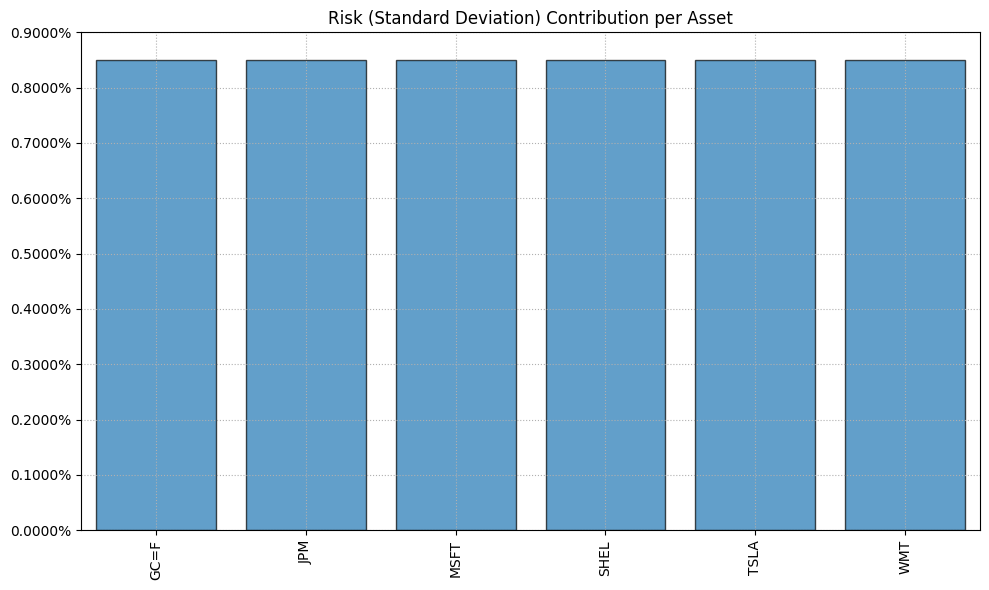

In [24]:
ax = rp.plot_risk_con(w=w_rp, cov=port.cov, returns=port.returns, rm=rm, rf=0, alpha=0.01,
                      color="tab:blue", height=6, width=10, ax=None)

In [25]:
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,GC=F,JPM,MSFT,SHEL,TSLA,WMT
weights,43.7890%,21.1234%,18.8359%,0.0000%,0.5640%,15.6877%


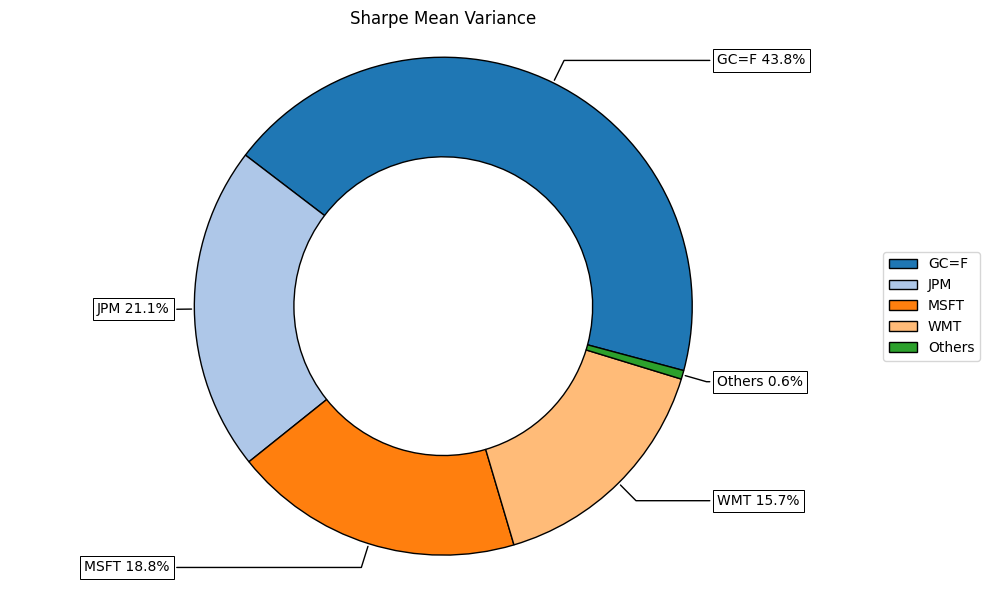

In [26]:
ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

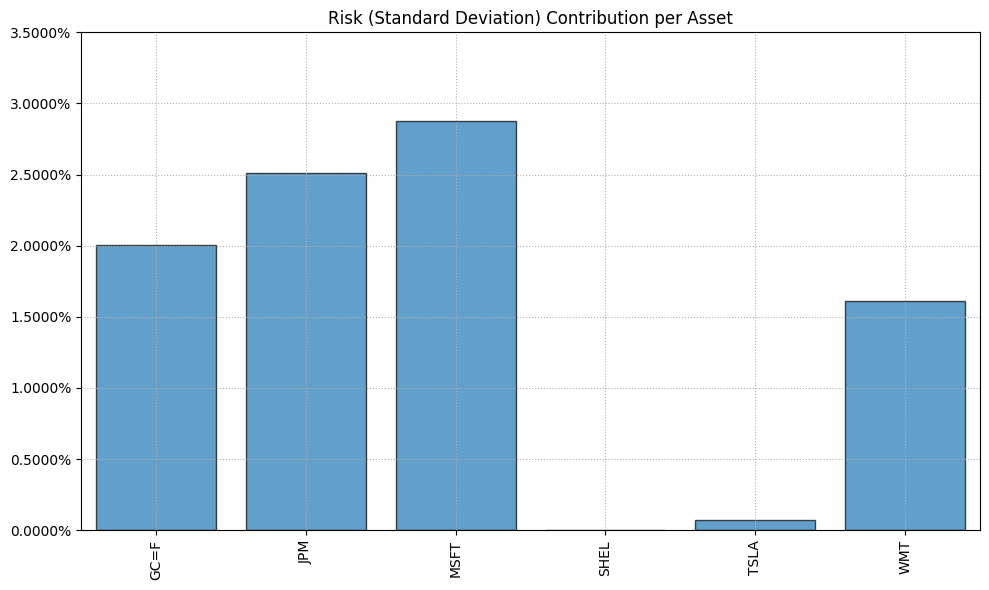

In [27]:
ax = rp.plot_risk_con(w, cov=port.cov, returns=port.returns, rm=rm, rf=0, alpha=0.01,
                      color="tab:blue", height=6, width=10, ax=None)